In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv('./data/Consumidor_Venta_Producto_UPC_Recom_2018_2020.csv')
english_cols = {'FACTURA_ID': 'INVOICE_ID', 'FACTURA_POSICION_ID': 'INVOICE_POSITION_ID', 'CUSTOMER_ID': 'CUSTOMER_ID',
                'FACTURA_CLASE_DOCUMENTO_ID': 'INVOICE_DOCUMENT_CLASS_ID', 'ANO_MES_FACTURA': 'INVOICE_MONTH_YEAR',
                'ANO_FACTURA': 'ORDER_YEAR', 'MES_FACTURA': 'ORDER_MONTH', 'FECHA_FACTURA': 'INVOICE_DATE',
                'IMP_VENTA_NETO_EUR': 'NET_SALES_EUR', 'CANAL_VENTA_ID': 'SALES_CHANNEL_ID',
                'CANAL_VENTA_DESC': 'SALES_CHANNEL_DESC', 'TEMPORADA_COMERCIAL_ID': 'SEASON_ID',
                'TEMPORADA_COMERCIAL_DESC': 'SEASON_DESC', 'PRODUCTO_ID': 'PRODUCT_ID', 'TALLA': 'SIZE',
                'MATERIAL_ID': 'MATERIAL_ID', 'NUMERO_DEUDOR_PAIS_ID': 'SALE_COUNTRY_ID',
                'NUMERO_DEUDOR_PAIS_DESC': 'SALE_COUNTRY_DESC', 'VENTA_DEVOLUCION': 'SALES_FILTER',
                'JERARQUIA_PROD_ID': 'PRODUCT_HIERARCHY_ID', 'GRUPO_ARTICULO_PRODUCTO_ID': 'PRODUCT_GROUP_ID',
                'GRUPO_ARTICULO': 'PRODUCT_GROUP', 'CONCEPTO': 'CONCEPT', 'LINEA': 'LINE',
                'GENERO_PRODUCTO': 'PRODUCT_GENDER', 'CATEGORIA': 'PRODUCT_CATEGORY', 'TIPOLOGIA': 'PRODUCT_TYPE',
                'COLOR': 'COLOR_INTERN', 'CONSUMER_COLOR': 'COLOR_EXTERN', 'CREMALLERA': 'ZIPPER', 'CORDONES': 'LACES',
                'OUTSOLE_SUELA_TIPO': 'SOLE_TYPE', 'OUTSOLE_SUELA_SUBTIPO': 'SOLE_SUBTYPE',
                'PLANTILLA_EXTRAIBLE': 'REMOVABLE_SOLE', 'CONTACTO_SN': 'PHYSICAL_CONTACT', 'EDAD_SN': 'AGE_AVAILABLE',
                'GENERO_CONTACTO': 'GENDER_AVAILABLE', 'EDAD_COMPRA': 'AGE_AT_PURCHASE',
                'EDAD_RANGO_COMPRA': 'AGE_RANGE',
                'PAIS_CONTACTO': 'COUNTRY_CONTACT_ID', 'PAIS_CONTACTO_DESC': 'COUNTRY_CONTACT_DESC',
                'CIUDAD_CONTACTO': 'CITY_CONTACT', 'IDIOMA_CONTACTO': 'LANGUAGE_CONTACT'}


In [3]:
dropcols = ['INVOICE_MONTH_YEAR', 'ORDER_YEAR','ORDER_MONTH','SALES_CHANNEL_ID',\
            'SALES_CHANNEL_DESC','AGE_AVAILABLE','MATERIAL_ID','COUNTRY_CONTACT_DESC',\
            'SALE_COUNTRY_DESC','SALES_FILTER','SEASON_ID','GENDER_AVAILABLE']

In [4]:
# gets most common country for the code
def country_dict(df, id_field,desc_field):
    country_dict = {x[id_field]:x[desc_field] for x in df.groupby(id_field)[desc_field].apply(lambda x: x.mode()).to_frame().reset_index().to_dict('index').values()}
    return country_dict

In [5]:
country_lookup = country_dict(data, 'PAIS_CONTACTO','PAIS_CONTACTO_DESC')
country_lookup.update(country_dict(data, 'NUMERO_DEUDOR_PAIS_ID','NUMERO_DEUDOR_PAIS_DESC'))
country_lookup



{'AD': 'ANDORRA',
 'AE': 'EMIRATOS ÁRABES UNIDOS',
 'AF': 'AFGANISTÁN',
 'AG': 'ANTIGUA Y BARBUDA',
 'AL': 'ALBANIA',
 'AR': 'ARGENTINA',
 'AT': 'AUSTRIA',
 'AU': 'AUSTRALIA',
 'AZ': 'AZERBAYÁN',
 'BA': 'BOSNIA-HERZEGOVINA',
 'BE': 'BÉLGICA',
 'BG': 'BULGARIA',
 'BR': 'BRAZIL',
 'BY': 'BIELORRUSIA',
 'CA': 'CANADA',
 'CH': 'SWITZERLAND',
 'CL': 'CHILE',
 'CN': 'CHINA',
 'CO': 'COLOMBIA',
 'CR': 'COSTA RICA',
 'CU': 'CUBA',
 'CY': 'CHIPRE',
 'CZ': 'REPÚBLICA CHECA',
 'DE': 'GERMANY',
 'DK': 'DENMARK',
 'EC': 'ECUADOR',
 'EE': 'ESTONIA',
 'EG': 'EGIPTO',
 'ES': 'SPAIN',
 'FI': 'FINLANDIA',
 'FR': 'FRANCE',
 'GB': 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND',
 'GE': 'GEORGIA',
 'GP': 'GUADALUPE',
 'GR': 'GREECE',
 'HK': 'HONG KONG',
 'HR': 'CROACIA',
 'HU': 'HUNGRÍA',
 'IE': 'IRELAND',
 'IL': 'ISRAEL',
 'IN': 'INDIA',
 'IS': 'ISLANDIA',
 'IT': 'ITALY',
 'JP': 'JAPAN',
 'KR': 'KOREA REPUBLIC OF',
 'KZ': 'KAZAJSTÁN',
 'LA': 'LAOS',
 'LI': 'LIECHTENSTEIN',
 'LT': 'LITUANIA',
 'LU':

In [6]:
def preprocess(d):
    d_copy = d.rename(columns=english_cols)
    d_copy['REMOVABLE_SOLE'] = d_copy['REMOVABLE_SOLE'].apply(lambda x: True if x == 'Extraible' else False)
    
    invoice_id_dict = {'ZTON':'Sale','ZDVN':'Return','ZDAN':'Cancelled Return'}
    d_copy['INVOICE_DOCUMENT_CLASS_ID'] = d_copy['INVOICE_DOCUMENT_CLASS_ID'].apply(lambda x: invoice_id_dict[x])
    
    d_copy['INVOICE_DATE'] = pd.to_datetime(d_copy.INVOICE_DATE)
    
    d_copy.AGE_AT_PURCHASE = d_copy.AGE_AT_PURCHASE.replace(0, np.nan)
    
    d_copy.ZIPPER = d_copy.ZIPPER.apply(lambda x: True if x in ('SI','YES') else False)
    d_copy.LACES = d_copy.LACES.apply(lambda x: True if x in ('With laces', 'Con cordones') else False)
    
    d_copy.PHYSICAL_CONTACT = d_copy.PHYSICAL_CONTACT.apply(lambda x: True if x == 'S' else False)
    
    
    return d_copy



In [7]:
cleandata = preprocess(data)
cleandata = cleandata.drop(columns=dropcols)



In [14]:
cleandata.groupby('CUSTOMER_ID').size()


CUSTOMER_ID
++/DcYFzQ1gIUJza+neA8NadxET0/nofxMP2xeocbt4=    2
++/RB4do2DxW6/bkh8jUK3zw9JxzStn/dbEjQxvIxkQ=    1
++00bzGka2b8Wztp2jO3FgPtNBlG7EddjjW/7+WxP4o=    1
++02Ly6o8yS/HLJrSkkNiguWcOWl7268zltL3qvkv4Q=    1
++2M85GZOkggCCk8EC5PyRmRjeeQTsmswSlLwA7xZd4=    1
                                               ..
zzwDSBdyLJdCo2arT4lPfMA8Okd3xirrlmNNSe6+ojw=    3
zzwGZchZX+ScdmC/xLiRbqxjAEeB7xZcLV6Au2HjY7c=    4
zzx8SoQJefRX1/2jmKTTmFxHk7CbpBe5KV6fOedaSR8=    3
zzzQiUfgIUY1DgB653FbVcRUVxKTPafMP2wLDVT8Xzs=    1
zzzfi+QNP+Ce5s+UcQTCYVDtjLnQtBt6DcCVDI6LvHU=    2
Length: 516919, dtype: int64

In [10]:
# below shows that sale country and country contact not always the same
cleandata[cleandata.SALE_COUNTRY_ID != cleandata.COUNTRY_CONTACT_ID][['SALE_COUNTRY_ID','COUNTRY_CONTACT_ID']]

,SALE_COUNTRY_ID,COUNTRY_CONTACT_ID
63,ES,NaN
132,US,MX
228,US,NO
337,GB,NaN
346,US,ES
...,...,...
1325476,TR,US
1326337,TW,FR
1326379,KR,AD
1326514,US,ES


<AxesSubplot:xlabel='NET_SALES_EUR', ylabel='Count'>

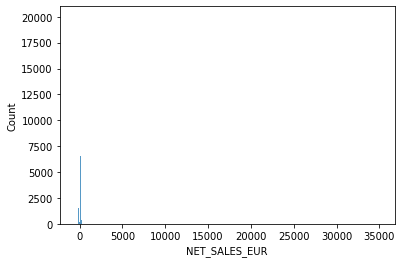

In [11]:
sns.histplot(data=cleandata, x="NET_SALES_EUR")
